In [19]:
from pydataset import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import env

## In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- ### print the first 3 rows
- ### print the number of rows and columns (shape)
- ### print the column names
- ### print the data type of each column
- ### print the summary statistics for each of the numeric variables

In [2]:
iris = data('iris')
df_iris = pd.DataFrame(iris)

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.
- Make sure that the spreadsheet is publicly visible under your sharing settings.

In [8]:
https://docs.google.com/spreadsheets/d/1v_R218o2cuT8LfTxmE8DyF_ujNeGcplDjFKvQ6yIFPs/edit#gid=1023018493
#     export?format=csv&gid=341089357'

SyntaxError: invalid syntax (300247543.py, line 1)

In [ ]:
cust_detail = 'https://docs.google.com/spreadsheets/d/1xoh7F7OrZYjLzBU8bWfxCmtaM_PmW1qmUU2_mOeikjU/edit#gid=130156301'
cust_detail_csv = cust_detail.replace('/edit#gid=', '/export?format=csv&gid=')
cust_detail_csv

In [ ]:
df_google_sheets =  pd.read_csv(cust_detail_csv)
df_google_sheets.head()

- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
# first 100 rows
df_google_sheets_sample = df_google_sheets.head(100)
df_google_sheets_sample.head()

In [ ]:
# no of rows and columns for new dataframe
df_google_sheets_sample.shape

In [ ]:
#7049 rows, 13 columns in original dataframe
df_google_sheets.shape

In [ ]:
len(df_google_sheets)

In [ ]:
# first 5 columns of the original dataframe df_google_sheets
df_google_sheets.columns[:5]

In [ ]:
#datatypes of each columns
df_google_sheets.dtypes

In [ ]:
# columns with 'object' datatypes
df_google_sheets.columns[df_google_sheets.dtypes == 'object']

In [ ]:
df_google_sheets.select_dtypes(include='object').columns.tolist()

In [ ]:
#transpose of a dataframe summary
sum_stats= df_google_sheets[['monthly_charges','total_charges','tenure']].describe().T
sum_stats

In [ ]:
## range values for (month,total) charges and tenure which are numerical datatypes
sum_stats['range_stats']=sum_stats['max'] - sum_stats['min']
sum_stats

### Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). ### Read the Table1_CustDetails worksheet into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
df_excel = pd.read_excel('customer.xlsx')
df_excel.head()

In [ ]:
# first 100 rows
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

In [ ]:
df_excel.shape

In [ ]:
#columns with object datatypes
df_excel.columns[df_excel.dtypes == 'object']

In [ ]:
# first 5 columns
df_excel.columns[:5]

In [ ]:
#range for numeric column
numeric = df_excel[['monthly_charges','total_charges','tenure']].describe().T
numeric

In [ ]:
numeric['range']= numeric['max'] - numeric['min']
numeric

### Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [ ]:
train = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
train_csv = train.replace('/edit#gid=', '/export?format=csv&gid=')
train_csv

In [ ]:
df_google = pd.read_csv(train_csv)
df_google.head()

In [ ]:
# first 3 rows
df_google.head(3)

In [ ]:
# no of rows and column
df_google.shape

In [ ]:
#columns name 
df_google.columns.to_list()

In [ ]:
# datatypes of each column
df_google.dtypes

In [ ]:
#shows non-null values and datatypes of each column
df_google.info()

In [ ]:
#summary statistics
df_google.describe()

In [ ]:
# unique values in each column
for col in df_google.columns:
    if df_google[col].dtypes =='object':
        print(f'{col} has {df_google[col].nunique()} unique values')

# Exploratory Analysis


## Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

- Acquire, prepare & split your data.

- ### Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [32]:
from acquire import get_iris_data
from prepare import prep_iris, train_validate_test_split



In [33]:
df = get_iris_data()
df= prep_iris(df)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [49]:
train, validate, test = train_validate_test_split(df,target='species')
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [55]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


In [41]:
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

<AxesSubplot:>

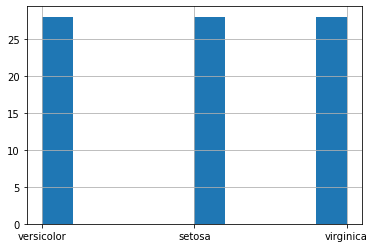

In [46]:
train.species.hist()

<AxesSubplot:>

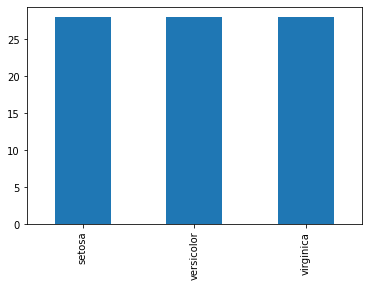

In [45]:
train.species.value_counts().sort_index().plot.bar()

In [61]:
print(train.versicolor.mean())
print(train.virginica.mean())

0.3333333333333333
0.3333333333333333
